## Data Exploration and Visualization with Python

### Set Up and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir ('C:\\Users\\mkorzec\Downloads')

from datetime import datetime

In [2]:
data = pd.read_csv('load_weather.csv')
cal = pd.read_csv('Calendar.csv')

In [3]:
data.head()

,Year,Month,Day,Hour,Load,Temperature,DewPoint,WindSpeed,CloudCover,SolarRadiation,RainFall
0,2009,1,1,0,70232,20.87,11.38,6.99,45.9,0.0,0.0
1,2009,1,1,1,68422,20.61,11.96,6.37,47.1,0.0,0.0
2,2009,1,1,2,67014,20.27,12.59,6.31,36.6,0.0,0.0
3,2009,1,1,3,66068,20.52,12.66,7.86,33.0,0.0,0.0
4,2009,1,1,4,65781,21.45,13.23,7.90,39.1,0.0,0.0


In [4]:
cal.head()

,Year,Month,Day,Weekday,Holiday
0,2009,1,1,4,1
1,2009,1,2,5,0
2,2009,1,3,6,0
3,2009,1,4,0,0
4,2009,1,5,1,0


### Join two tables by Year, Month and Day

In [5]:
clean = pd.merge(data, cal, on = ['Year', 'Month', 'Day'])

In [6]:
# Check for missing values

In [7]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82584 entries, 0 to 82583
Data columns (total 13 columns):
Year              82584 non-null int64
Month             82584 non-null int64
Day               82584 non-null int64
Hour              82584 non-null int64
Load              82584 non-null int64
Temperature       82584 non-null float64
DewPoint          82584 non-null float64
WindSpeed         82584 non-null float64
CloudCover        82584 non-null float64
SolarRadiation    82584 non-null float64
RainFall          82584 non-null float64
Weekday           82584 non-null int64
Holiday           82584 non-null int64
dtypes: float64(6), int64(7)
memory usage: 8.8 MB


In [8]:
clean.head()

,Year,Month,Day,Hour,Load,Temperature,DewPoint,WindSpeed,CloudCover,SolarRadiation,RainFall,Weekday,Holiday
0,2009,1,1,0,70232,20.87,11.38,6.99,45.9,0.0,0.0,4,1
1,2009,1,1,1,68422,20.61,11.96,6.37,47.1,0.0,0.0,4,1
2,2009,1,1,2,67014,20.27,12.59,6.31,36.6,0.0,0.0,4,1
3,2009,1,1,3,66068,20.52,12.66,7.86,33.0,0.0,0.0,4,1
4,2009,1,1,4,65781,21.45,13.23,7.90,39.1,0.0,0.0,4,1


In [9]:
# Plot to visualize missing values

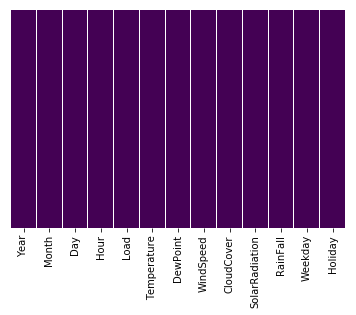

In [10]:
sns.heatmap(clean.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

There are no missing values in our dataset

In [11]:
# Check the holiday count

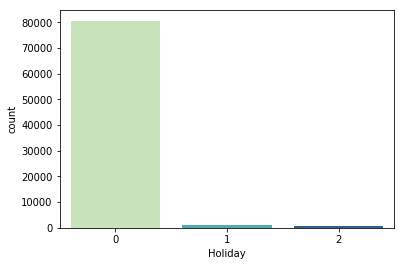

In [12]:
sns.countplot(x = 'Holiday', data = clean, palette = 'YlGnBu')

There are few holidays that should be deleted from the dataset

In [13]:
# Drop rows when Holiday = 1 or 2

In [14]:
d1 = clean[clean['Holiday'] == 0]

Now the data is ready to be explored further

In [15]:
# Check the distribution of y-variable

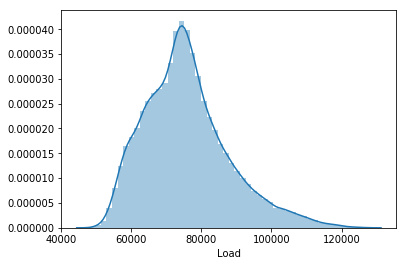

In [16]:
sns.distplot(d1['Load'])

- Deviate from normal,

- Positively skewed,

- Needs Transformation

In [17]:
# Check correlation between all variables

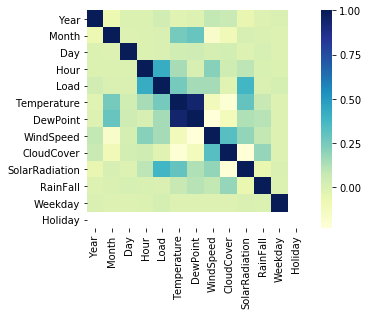

In [18]:
corrmat = d1.corr()
sns.heatmap(corrmat, square = True, cmap = "YlGnBu")

In [19]:
# Scatterplot for all variables

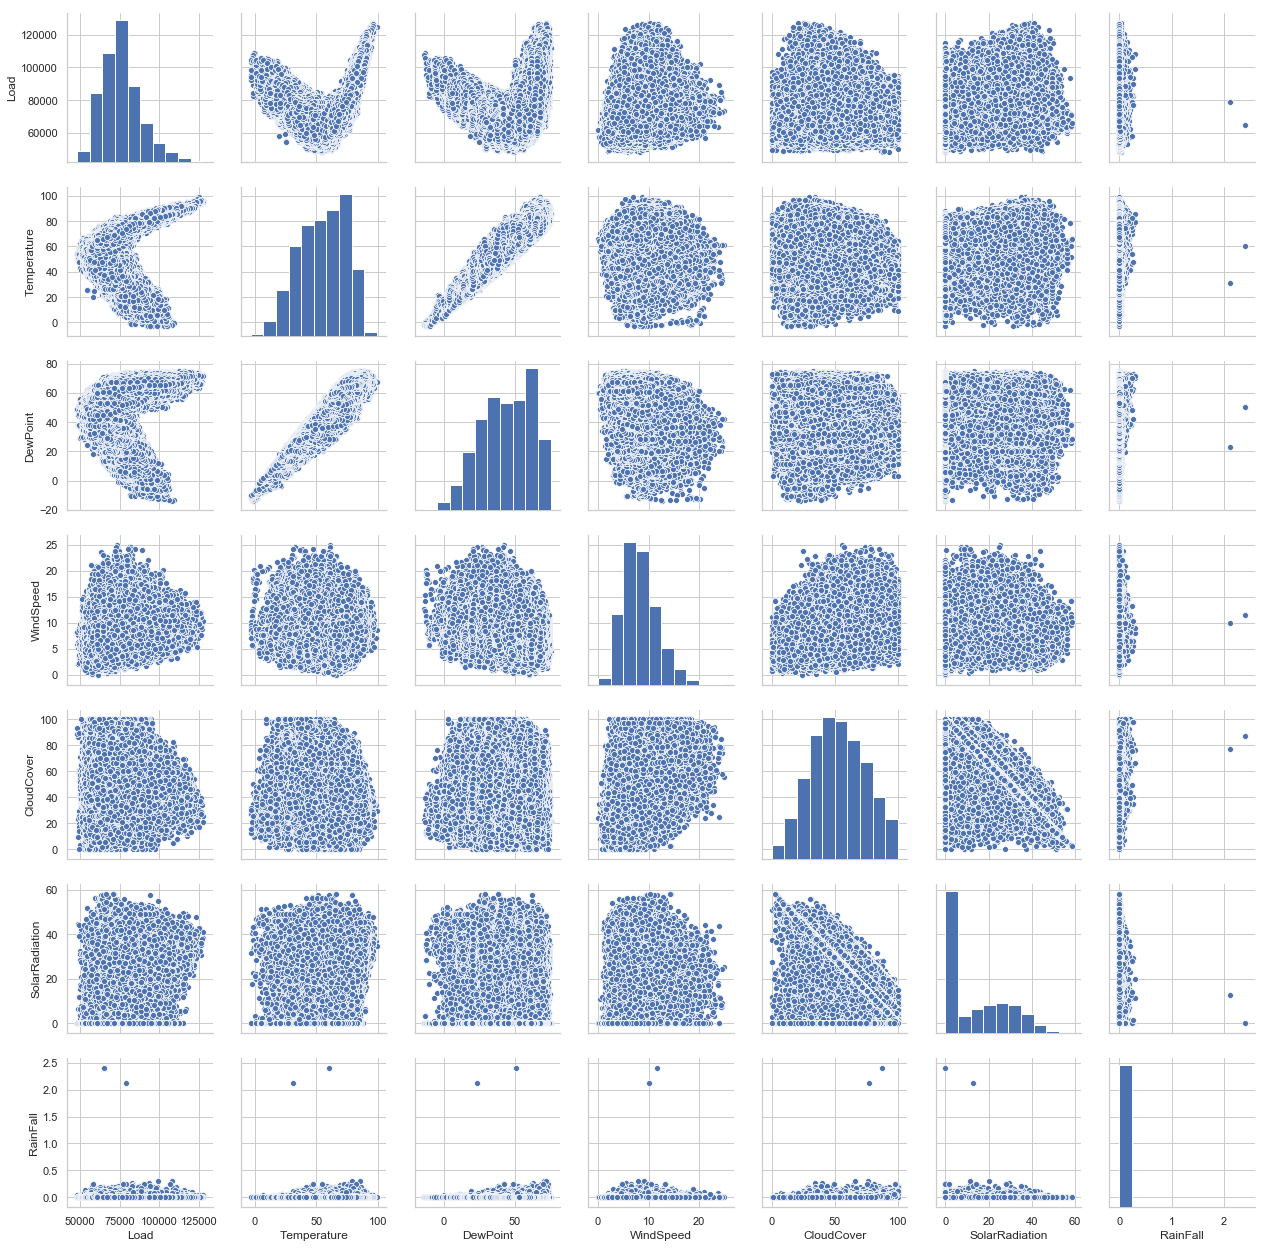

In [20]:
sns.set(style = "whitegrid")
cols = ['Load', 'Temperature', 'DewPoint', 'WindSpeed', 'CloudCover', 'SolarRadiation', 'RainFall']
sns.pairplot(d1[cols], size = 2.5)

- Many not so linear relationships
- Some multicollinearity between dew point and temperature
- some outliers observed on rain fall variable

In [21]:
# Delete thew two observations where Rain Fall > 2

In [22]:
d1 = d1.drop(d1[d1.RainFall > 2].index)

### Let's explore time variables

In [23]:
# Load at different months

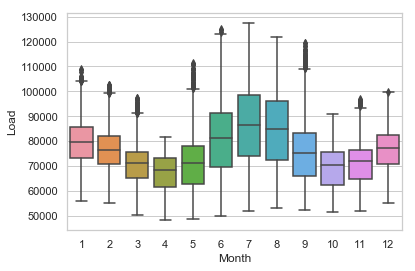

In [24]:
sns.boxplot(x = 'Month', y = 'Load', data = d1)

- Summer months have the highest load
- Spring and Fall tend to have the lowest loads

In [25]:
# Load at different days of the weak

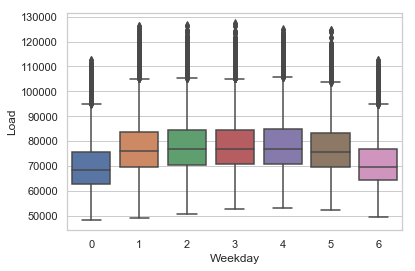

In [26]:
sns.boxplot(x = 'Weekday', y = 'Load', data = d1)

- Seems like weekend load are significantly lower than weekday loads

In [27]:
# Incorporate time of the day into the plots

In [28]:
# Change Weekday from integer to category variable
d1['Weekday'] = d1['Weekday'].astype('category')

In [29]:
d1.dtypes

Year                 int64
Month                int64
Day                  int64
Hour                 int64
Load                 int64
Temperature        float64
DewPoint           float64
WindSpeed          float64
CloudCover         float64
SolarRadiation     float64
RainFall           float64
Weekday           category
Holiday              int64
dtype: object

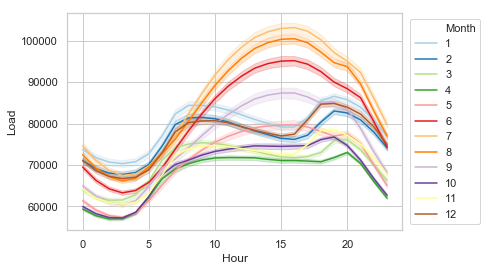

In [30]:
g = sns.lineplot(x = 'Hour', y = 'Load', hue = 'Month', estimator = 'mean', legend = 'full', palette = 'Paired', data = d1)
g.legend(loc = 'center right', bbox_to_anchor = (1.25, 0.5), ncol = 1)

- Highest load during summer months
- Consider dividing data into seasons

In [31]:
# Let's do the same for days of the week instead of months

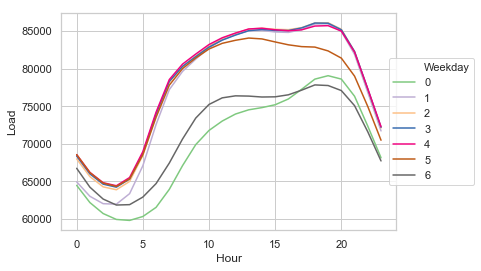

In [32]:
h = sns.lineplot(x = 'Hour', y = 'Load', hue = 'Weekday', estimator = 'mean', legend = 'full', 
                 palette = 'Accent', ci = None, data = d1)
h.legend(loc = 'center right', bbox_to_anchor = (1.25, 0.5), ncol = 1)

- Again, seems like weekends consume significantly less energy than week days on average

### Let's split the data into seasons and work with summer data as it is the most problematic

In [33]:
summer = d1[(d1['Month'] == 6) | (d1['Month'] == 7) | (d1['Month'] == 8)]
fall = d1[(d1['Month'] == 9) | (d1['Month'] == 10) | (d1['Month'] == 11)]
winter = d1[(d1['Month'] == 12) | (d1['Month'] == 1) | (d1['Month'] == 2)]
spring = d1[(d1['Month'] == 3) | (d1['Month'] == 4) | (d1['Month'] == 5)]

In [34]:
# Check the distribution of summer

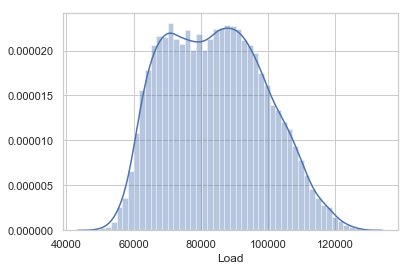

In [35]:
sns.distplot(summer['Load'])

Further divide data into weekends and weekdays

In [36]:
Week_Days = summer[(summer['Weekday'] != 0) | (summer['Weekday'] != 6)]
Week_Ends = summer[(summer['Weekday'] == 0) | (summer['Weekday'] == 6)]

In [44]:
Weekday_1 = Week_Days[(Week_Days['Hour'] == 1)]

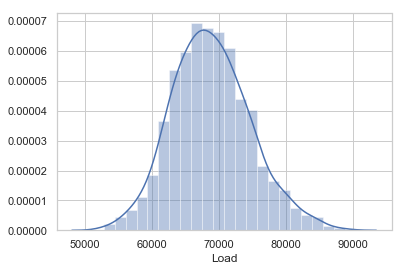

In [45]:
sns.distplot(Weekday_1['Load'])

In [46]:
Weekday_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 3625 to 82561
Data columns (total 13 columns):
Year              822 non-null int64
Month             822 non-null int64
Day               822 non-null int64
Hour              822 non-null int64
Load              822 non-null int64
Temperature       822 non-null float64
DewPoint          822 non-null float64
WindSpeed         822 non-null float64
CloudCover        822 non-null float64
SolarRadiation    822 non-null float64
RainFall          822 non-null float64
Weekday           822 non-null category
Holiday           822 non-null int64
dtypes: category(1), float64(6), int64(6)
memory usage: 84.7 KB


### In order to work with normally distributed data, we have to divide it into:
- Seasons
- Weeekend and Weekdays
- and Separate Hours

In [49]:
Weekday_1 = Week_Days[(Week_Days['Hour'] == 1)]
Weekday_2 = Week_Days[(Week_Days['Hour'] == 2)]
Weekday_3 = Week_Days[(Week_Days['Hour'] == 3)]
Weekday_4 = Week_Days[(Week_Days['Hour'] == 4)]
Weekday_5 = Week_Days[(Week_Days['Hour'] == 5)]
Weekday_6 = Week_Days[(Week_Days['Hour'] == 6)]
Weekday_7 = Week_Days[(Week_Days['Hour'] == 7)]
Weekday_8 = Week_Days[(Week_Days['Hour'] == 8)]
Weekday_9 = Week_Days[(Week_Days['Hour'] == 9)]
Weekday_10 = Week_Days[(Week_Days['Hour'] == 10)]
Weekday_11 = Week_Days[(Week_Days['Hour'] == 11)]
Weekday_12 = Week_Days[(Week_Days['Hour'] == 12)]
Weekday_13 = Week_Days[(Week_Days['Hour'] == 13)]
Weekday_14 = Week_Days[(Week_Days['Hour'] == 14)]
Weekday_15 = Week_Days[(Week_Days['Hour'] == 15)]
Weekday_16 = Week_Days[(Week_Days['Hour'] == 16)]
Weekday_17 = Week_Days[(Week_Days['Hour'] == 17)]
Weekday_18 = Week_Days[(Week_Days['Hour'] == 18)]
Weekday_19 = Week_Days[(Week_Days['Hour'] == 19)]
Weekday_20 = Week_Days[(Week_Days['Hour'] == 20)]
Weekday_21 = Week_Days[(Week_Days['Hour'] == 21)]
Weekday_22 = Week_Days[(Week_Days['Hour'] == 22)]
Weekday_23 = Week_Days[(Week_Days['Hour'] == 23)]
Weekday_0 = Week_Days[(Week_Days['Hour'] == 0)]

In [51]:
Weekend_1 = Week_Ends[(Week_Ends['Hour'] == 1)]
Weekend_2 = Week_Ends[(Week_Ends['Hour'] == 2)]
Weekend_3 = Week_Ends[(Week_Ends['Hour'] == 3)]
Weekend_4 = Week_Ends[(Week_Ends['Hour'] == 4)]
Weekend_5 = Week_Ends[(Week_Ends['Hour'] == 5)]
Weekend_6 = Week_Ends[(Week_Ends['Hour'] == 6)]
Weekend_7 = Week_Ends[(Week_Ends['Hour'] == 7)]
Weekend_8 = Week_Ends[(Week_Ends['Hour'] == 8)]
Weekend_9 = Week_Ends[(Week_Ends['Hour'] == 9)]
Weekend_10 = Week_Ends[(Week_Ends['Hour'] == 10)]
Weekend_11 = Week_Ends[(Week_Ends['Hour'] == 11)]
Weekend_12 = Week_Ends[(Week_Ends['Hour'] == 12)]
Weekend_13 = Week_Ends[(Week_Ends['Hour'] == 13)]
Weekend_14 = Week_Ends[(Week_Ends['Hour'] == 14)]
Weekend_15 = Week_Ends[(Week_Ends['Hour'] == 15)]
Weekend_16 = Week_Ends[(Week_Ends['Hour'] == 16)]
Weekend_17 = Week_Ends[(Week_Ends['Hour'] == 17)]
Weekend_18 = Week_Ends[(Week_Ends['Hour'] == 18)]
Weekend_19 = Week_Ends[(Week_Ends['Hour'] == 19)]
Weekend_20 = Week_Ends[(Week_Ends['Hour'] == 20)]
Weekend_21 = Week_Ends[(Week_Ends['Hour'] == 21)]
Weekend_22 = Week_Ends[(Week_Ends['Hour'] == 22)]
Weekend_23 = Week_Ends[(Week_Ends['Hour'] == 23)]
Weekend_0 = Week_Ends[(Week_Ends['Hour'] == 0)]

### Creating a model for Summer, Weekday, Hour = 1

In [52]:
Weekday_1.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Load', 'Temperature', 'DewPoint',
       'WindSpeed', 'CloudCover', 'SolarRadiation', 'RainFall', 'Weekday',
       'Holiday'],
      dtype='object')

In [53]:
X = Weekday_1[['Temperature', 'DewPoint', 'WindSpeed', 'CloudCover', 'SolarRadiation', 'RainFall', 'Weekday']]

In [54]:
y = Weekday_1['Load']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Set up a training and testing data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [59]:
# Create a regression model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
# Check intercept and coefficients

In [65]:
print(lm.intercept_)

-13323.951526997873


In [66]:
pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

,Coeff
Temperature,1.101844e+03
DewPoint,5.481589e+01
WindSpeed,3.861776e+01
CloudCover,-3.046878e+01
SolarRadiation,4.263256e-12
RainFall,-1.631977e+03
Weekday,4.757888e+02


### Predictions for the model above

In [68]:
predictions = lm.predict(X_test)

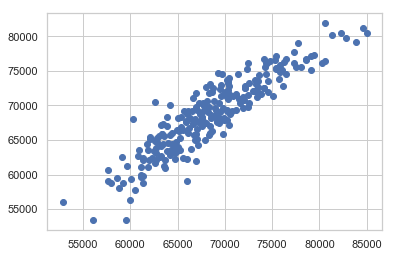

In [69]:
plt.scatter(y_test, predictions)

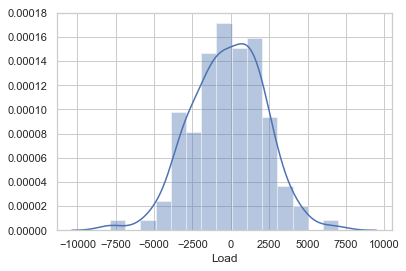

In [70]:
sns.distplot((y_test - predictions))

In [71]:
from sklearn import metrics

In [72]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, predictions)

1886.2992010012813

In [73]:
# Mean Squared Error

In [74]:
metrics.mean_squared_error(y_test, predictions)

5533194.171033425

In [75]:
# R-Squared value
metrics.r2_score(y_test, predictions)

0.8262173308040326

# This was just an example of one of the 48 models of this project

### There are 48 models, 24 weekend and 24 weekdays models for every hour